In [ ]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


First few rows of the data:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000


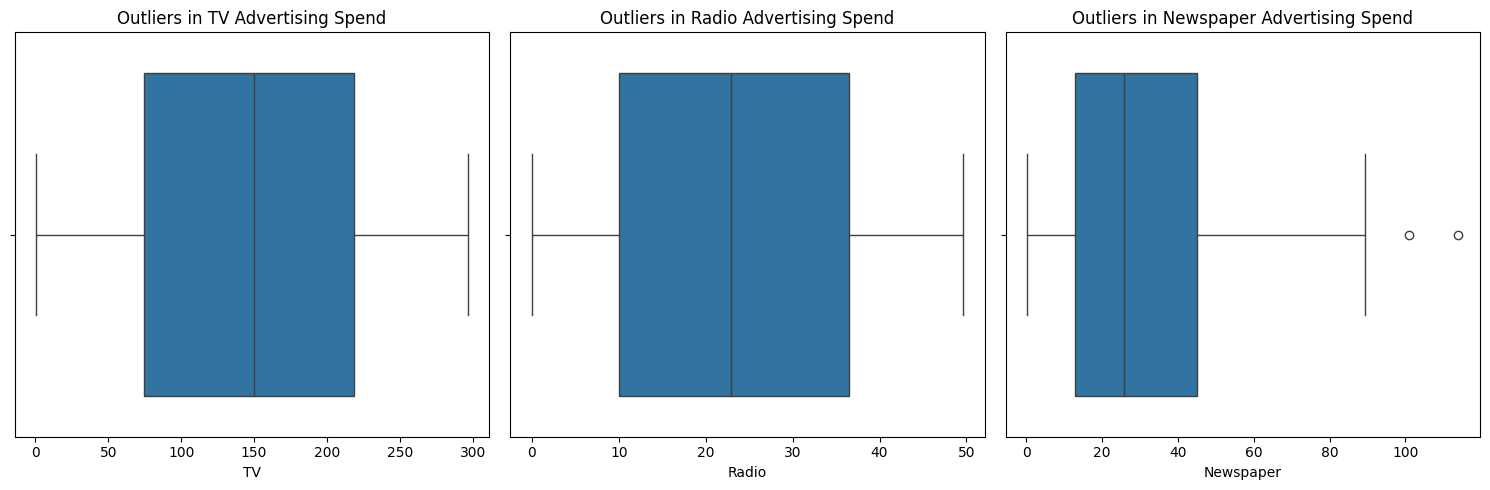

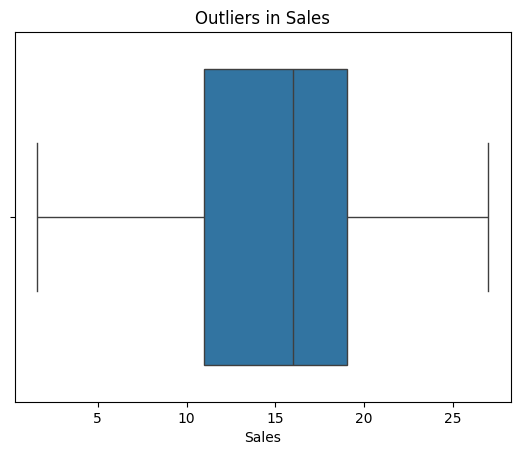



Scaled Data (First 5 rows):
         TV     Radio  Newspaper  Sales
0  0.969852  0.981522   1.778945   22.1
1 -1.197376  1.082808   0.669579   10.4
2 -1.516155  1.528463   1.783549   12.0
3  0.052050  1.217855   1.286405   16.5
4  0.394182 -0.841614   1.281802   17.9


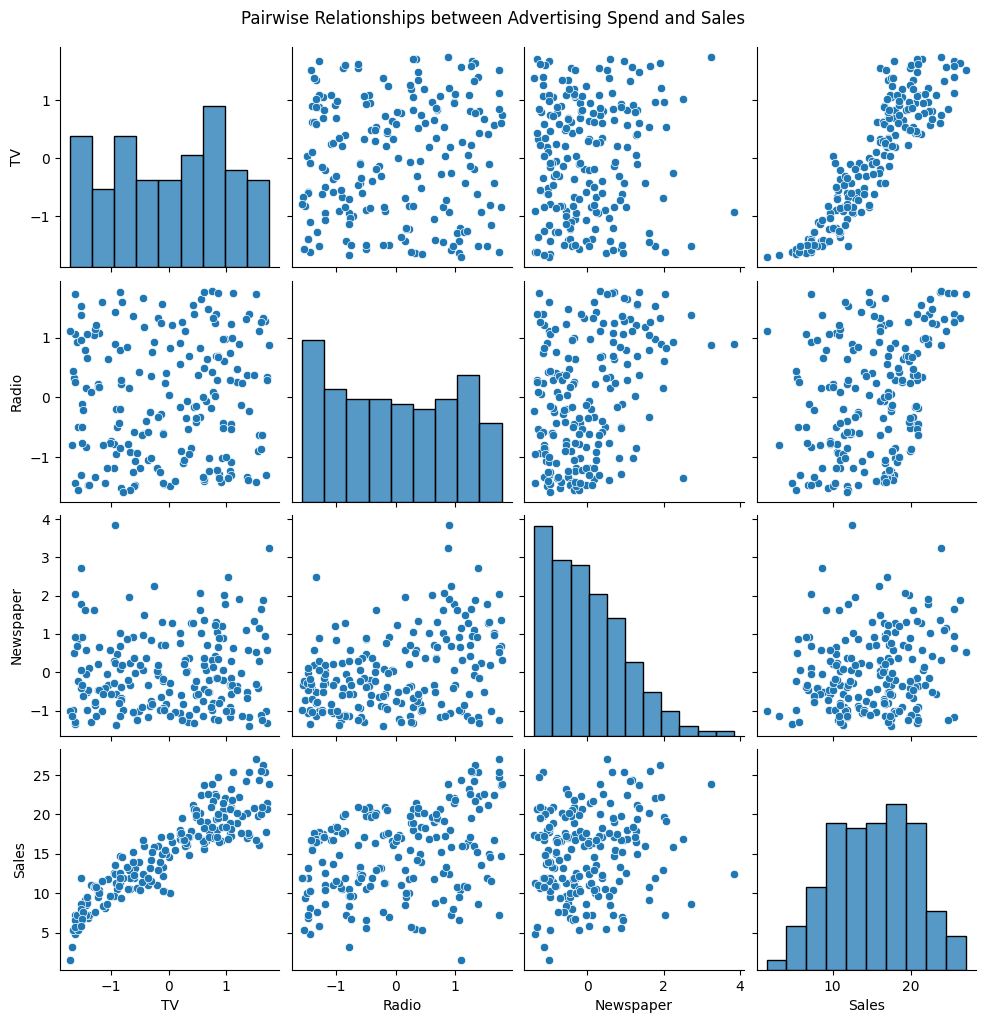

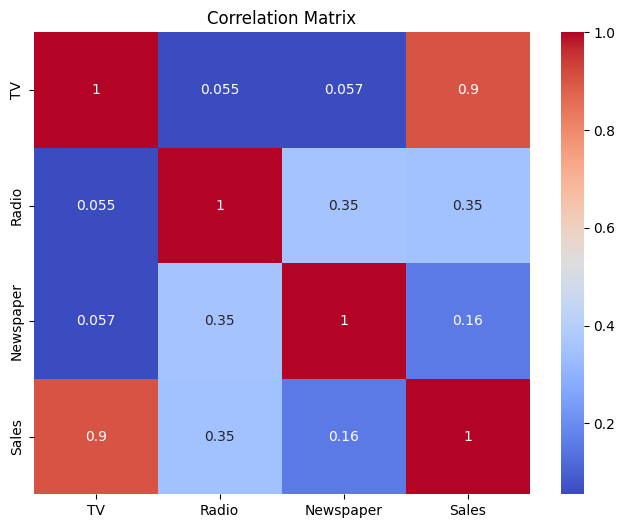

Shape of X_train: (160, 3)
Shape of X_test: (40, 3)
Shape of y_train: (160,)
Shape of y_test: (40,)


Model Evaluation:
Mean Squared Error (MSE): 2.91
R-squared (R2) Score: 0.91




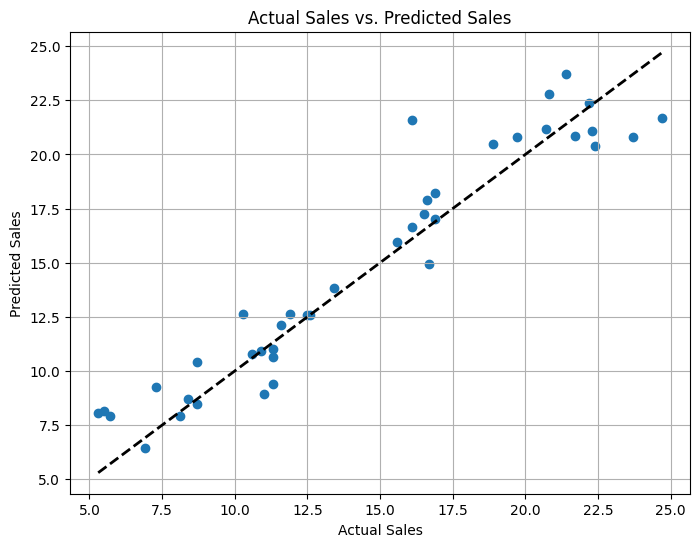

Model Coefficients:
     Feature  Coefficient
0         TV     4.668138
1      Radio     1.494965
2  Newspaper     0.094210


Intercept: 15.21


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold


#data loading and getting to know the basic information about this data
data = pd.read_csv('advertising.csv')

print("First few rows of the data:")
print(data.head())
print("\n")

print("Information about the dataset:")
print(data.info())
print("\n")

print("Summary statistics:")
print(data.describe())
print("\n")


#Check for Missing Values
print("Missing Values:")
print(data.isnull().sum())
print("\n")

#Outlier Detection
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=data['TV'])
plt.title('Outliers in TV Advertising Spend')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['Radio'])
plt.title('Outliers in Radio Advertising Spend')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['Newspaper'])
plt.title('Outliers in Newspaper Advertising Spend')

plt.tight_layout()
plt.show()

sns.boxplot(x=data['Sales'])
plt.title('Outliers in Sales')
plt.show()
print("\n")

#Feature Scaling (Standardization)
numerical_features = ['TV', 'Radio', 'Newspaper']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Scaled Data (First 5 rows):")
print(data.head())

# Visualize the relationships between advertising spend and sales
sns.pairplot(data)
plt.suptitle("Pairwise Relationships between Advertising Spend and Sales", y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Define features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\n")

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print("\n")

# Visualize the predictions vs. actual values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect predictions
plt.grid(True)
plt.show()

# Get the coefficients and intercept of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Model Coefficients:")
print(coefficients)
print("\n")
print(f"Intercept: {model.intercept_:.2f}")

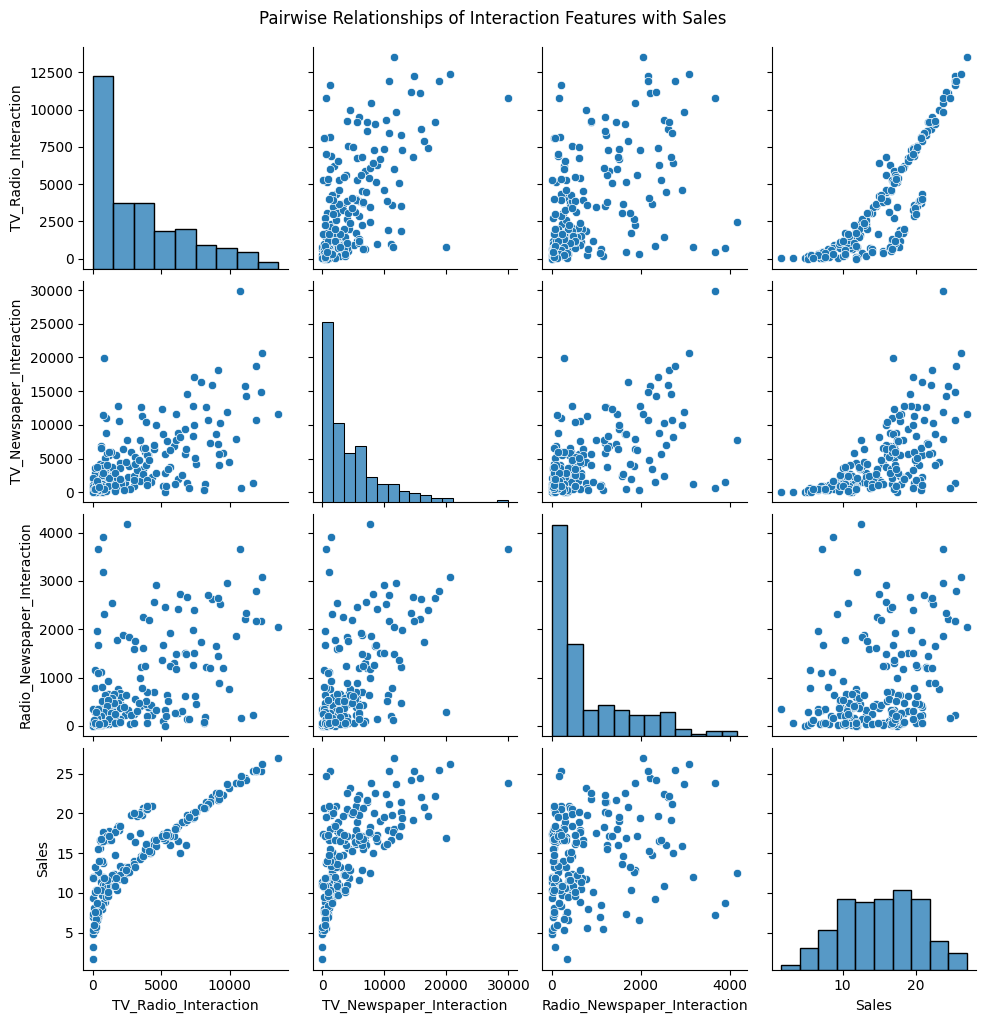

Random Forest Regression:
Mean Squared Error (MSE): 1.23
R-squared (R2) Score: 0.96


Cross-Validation Results (Random Forest):
Mean MSE: 1.20
Std MSE: 0.42
R-squared (R2) Score: 0.96


Feature Importance (Random Forest):
                       Feature  Importance
0                           TV    0.788742
3         TV_Radio_Interaction    0.185172
4     TV_Newspaper_Interaction    0.008101
2                    Newspaper    0.006522
1                        Radio    0.006459
5  Radio_Newspaper_Interaction    0.005003




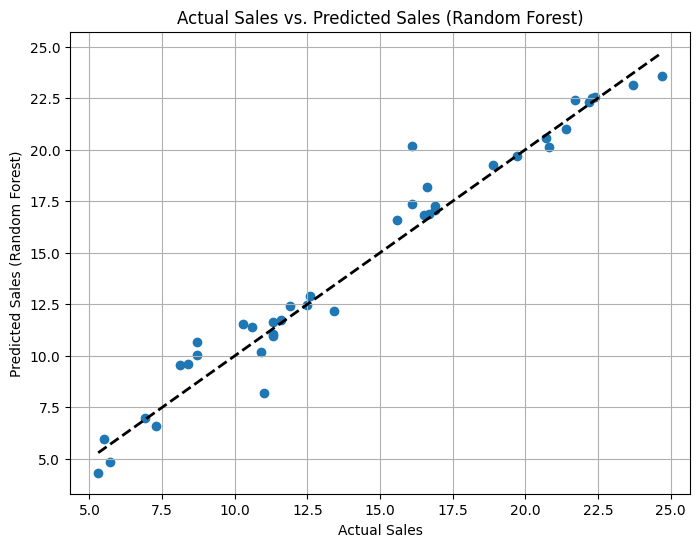

In [ ]:
# Feature Engineering: Interaction Terms
data['TV_Radio_Interaction'] = data['TV'] * data['Radio']
data['TV_Newspaper_Interaction'] = data['TV'] * data['Newspaper']
data['Radio_Newspaper_Interaction'] = data['Radio'] * data['Newspaper']

# Visualize the new features
sns.pairplot(data, vars=['TV_Radio_Interaction', 'TV_Newspaper_Interaction', 'Radio_Newspaper_Interaction', 'Sales'])
plt.suptitle("Pairwise Relationships of Interaction Features with Sales", y=1.02)
plt.show()

# Define features (X) and target (y) - Include interaction terms
X = data[['TV', 'Radio', 'Newspaper', 'TV_Radio_Interaction', 'TV_Newspaper_Interaction', 'Radio_Newspaper_Interaction']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators
rf_model.fit(X_train, y_train)

# Model predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")
print("\n")

# Cross-Validation for Random Forest
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')  # Use negative MSE

# Convert the negative MSE scores to positive MSE values
cv_mse_rf = -cv_scores_rf
print("Cross-Validation Results (Random Forest):")
print(f"Mean MSE: {cv_mse_rf.mean():.2f}")
print(f"Std MSE: {cv_mse_rf.std():.2f}")  # Standard deviation of the MSE
print(f"R-squared (R2) Score: {r2_rf:.2f}") #added r2 of rf model
print("\n")

# Feature Importance (Random Forest)
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print("Feature Importance (Random Forest):")
print(feature_importance_rf)
print("\n")

# Visualize Predictions vs. Actuals (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Random Forest)")
plt.title("Actual Sales vs. Predicted Sales (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()
